### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import math

In [2]:
# getting path of the file containing dataset

file_path=r"C:\Users\shailesh mhalsekar\Downloads\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (3).xls"
data=pd.read_excel(file_path)# loading dataset
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [3]:
# displaying maximum number of columns present
data.head(pd.set_option("display.max_columns",None))

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0                   10                  3                           4   
1                   14                  4                           4   
2                    5                  4                           4   
3                   10                  4                           2   
4                   16                  4                           1   
...                ...                ...                         ...   
1195                 3                  1                           4   
1196                10                  2                           4   
1197                28                  1                           4   
1198                 9                  3                           4   
1199                 3                  2                           1   

      EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0                55                  3            2                   4   
1                42                  3            2                   1   
2                48                  2            3                   1   
3                73                  2            5                   4   
4                84                  3            2                   1   
...             ...                ...          ...                 ...   
1195             71                  4            2                   4   
1196             80                  4            1                   4   
1197             74                  4            1                   3   
1198             46                  2            3                   2   
1199             65                  3            2                   3   

      NumCompaniesWorked OverTime  EmpLastSalaryHikePercent  \
0                      1       No                        12   
1                      2       No                        12   
2                      5      Yes                        21   
3                      3       No                        15   
4                      8       No                        14   
...                  ...      ...                       ...   
1195                   1      Yes                        20   
1196                   3       No                        17   
1197                   1      Yes                        11   
1198       

In [4]:
data.drop("EmpNumber",axis=1,inplace=True) # dropping unwanted column

# data preprocessing

### Checking for null/missing values

In [5]:
# checking for null values
data.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

#### No null values present in the dataset

# Encoding

In [6]:
(data.dtypes=="object").sum() # no categorical columns left

8

#### There are total 8 categorical columns which we need to encode.

In [7]:
# label Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [8]:

# using get_dummies method to encode
data.Gender=pd.get_dummies(data.Gender,drop_first=True)

In [9]:
lb=LabelEncoder()
for column in data.columns: # using for loop
    if data[column].dtype=="object":
        data[column]=lb.fit_transform(data[column])

In [10]:
(data.dtypes=="object").sum() # no categorical columns left

0

In [11]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3

# handling outliers

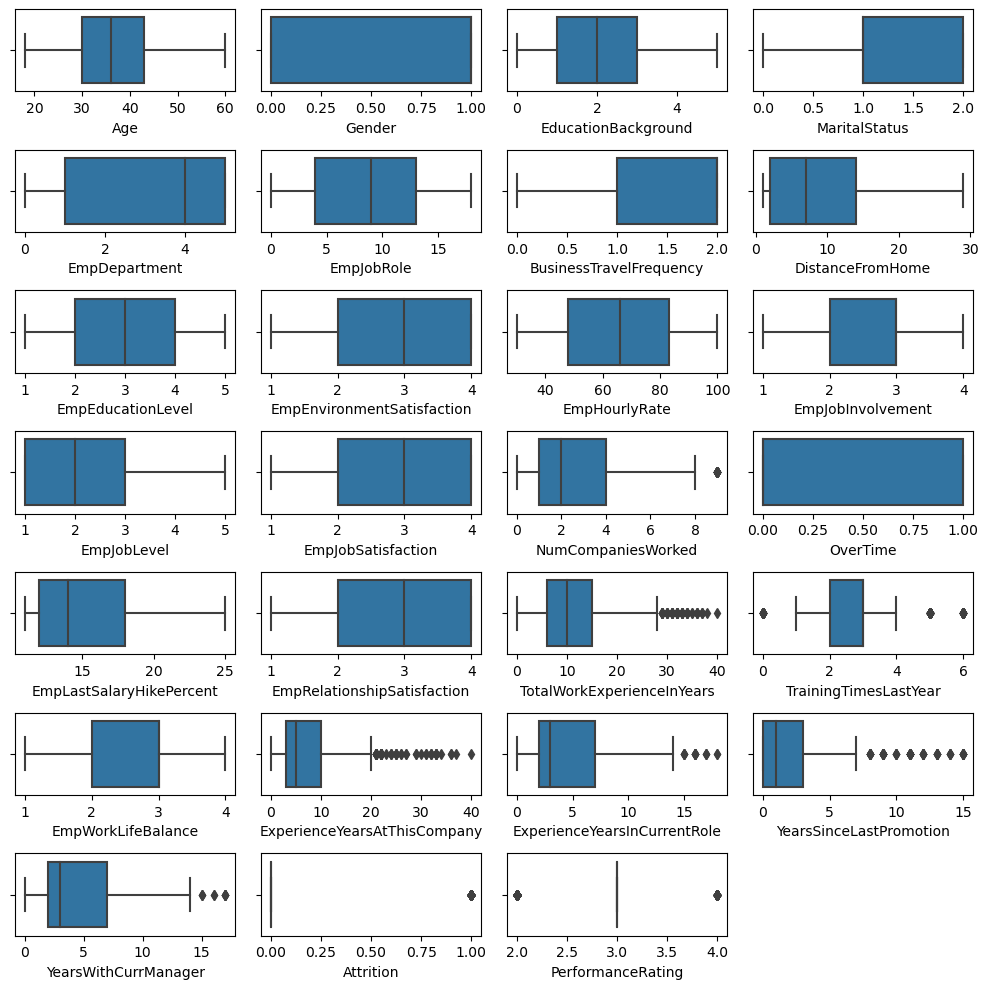

In [12]:
#Using boxplot to detect outliers
plt.figure(figsize=(10,10),facecolor='white')

plotnumber=1

for column in data:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(x = data[column])
        plotnumber+=1
plt.tight_layout()

## handling outliers by IQR method

#### TotalWorkExperienceInYears

In [13]:
from scipy import stats
IQR = stats.iqr(data.TotalWorkExperienceInYears, interpolation = 'midpoint')

## min and max limit calculation

# First quartile (Q1) 
Q1 = data.TotalWorkExperienceInYears.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.TotalWorkExperienceInYears.quantile(0.75)

##getting the limits
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 +1.5*IQR


data.loc[data.TotalWorkExperienceInYears>upper_limit,'TotalWorkExperienceInYears']=np.median(data.TotalWorkExperienceInYears)

#### TrainingTimesLastYear

In [14]:
IQR = stats.iqr(data.TrainingTimesLastYear, interpolation = 'midpoint')

## min and max limit calculation

# First quartile (Q1) 
Q1 = data.TrainingTimesLastYear.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.TrainingTimesLastYear.quantile(0.75)

##getting the limits
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 +1.5*IQR


data.loc[data.TrainingTimesLastYear>upper_limit,'TrainingTimesLastYear']=np.median(data.TrainingTimesLastYear)
data.loc[data.TrainingTimesLastYear<lower_limit,'TrainingTimesLastYear']=np.median(data.TrainingTimesLastYear)

#### ExperienceYearsAtThisCompany

In [15]:
IQR = stats.iqr(data.ExperienceYearsAtThisCompany, interpolation = 'midpoint')

## min and max limit calculation

# First quartile (Q1) 
Q1 = data.ExperienceYearsAtThisCompany.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.ExperienceYearsAtThisCompany.quantile(0.75)

##getting the limits
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 +1.5*IQR


data.loc[data.ExperienceYearsAtThisCompany>upper_limit,'ExperienceYearsAtThisCompany']=np.median(data.ExperienceYearsAtThisCompany)

#### ExperienceYearsInCurrentRole

In [16]:
IQR = stats.iqr(data.ExperienceYearsInCurrentRole, interpolation = 'midpoint')

## min and max limit calculation

# First quartile (Q1) 
Q1 = data.ExperienceYearsInCurrentRole.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.ExperienceYearsInCurrentRole.quantile(0.75)

##getting the limits
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 +1.5*IQR


data.loc[data.ExperienceYearsInCurrentRole>upper_limit,'ExperienceYearsInCurrentRole']=np.median(data.ExperienceYearsInCurrentRole)

#### YearsSinceLastPromotion

In [17]:
IQR = stats.iqr(data.YearsSinceLastPromotion, interpolation = 'midpoint')

## min and max limit calculation

# First quartile (Q1) 
Q1 = data.YearsSinceLastPromotion.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.YearsSinceLastPromotion.quantile(0.75)

##getting the limits
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 +1.5*IQR


data.loc[data.YearsSinceLastPromotion>upper_limit,'YearsSinceLastPromotion']=np.median(data.YearsSinceLastPromotion)

#### YearsWithCurrManager

In [18]:
IQR = stats.iqr(data.YearsWithCurrManager, interpolation = 'midpoint')

## min and max limit calculation

# First quartile (Q1) 
Q1 = data.YearsWithCurrManager.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.YearsWithCurrManager.quantile(0.75)

##getting the limits
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 +1.5*IQR


data.loc[data.YearsWithCurrManager>upper_limit,'YearsWithCurrManager']=np.median(data.YearsWithCurrManager)

# Feature Selection

## Checking correlation

In [19]:
data.corr() # using corr() function to check correlation

Age    Gender  EducationBackground  \
Age                           1.000000 -0.040107            -0.055905   
Gender                       -0.040107  1.000000             0.009922   
EducationBackground          -0.055905  0.009922             1.000000   
MaritalStatus                -0.098368 -0.042169            -0.001097   
EmpDepartment                -0.000104 -0.010925            -0.026874   
EmpJobRole                   -0.037665  0.011332            -0.012325   
BusinessTravelFrequency       0.040579 -0.043608             0.012382   
DistanceFromHome              0.020937 -0.001507            -0.013919   
EmpEducationLevel             0.207313 -0.022960            -0.047978   
EmpEnvironmentSatisfaction    0.013814  0.000033             0.045028   
EmpHourlyRate                 0.062867  0.002218            -0.030234   
EmpJobInvolvement             0.027216  0.010949            -0.025505   
EmpJobLevel                   0.509139 -0.050685            -0.056338   
EmpJobSatisfaction           -0.002436  0.024680            -0.030977   
NumCompaniesWorked            0.284408 -0.036675            -0.032879   
OverTime                      0.051910 -0.038410             0.007046   
EmpLastSalaryHikePercent     -0.006105 -0.005319            -0.009788   
EmpRelationshipSatisfaction   0.049749  0.030707             0.005652   
TotalWorkExperienceInYears    0.680886 -0.061055            -0.027929   
TrainingTimesLastYear        -0.016053 -0.057654             0.051596   
EmpWorkLifeBalance           -0.019563  0.015793             0.022890   
ExperienceYearsAtThisCompany  0.318852 -0.030392            -0.009887   
ExperienceYearsInCurrentRole  0.217163 -0.031823            -0.003215   
YearsSinceLastPromotion       0.228199 -0.021575             0.014277   
YearsWithCurrManager          0.205098 -0.036643             0.002767   
Attrition                    -0.189317  0.035758             0.027161   
PerformanceRating            -0.040164 -0.001780             0.005607   

                              MaritalStatus  EmpDepartment  EmpJobRole  \
Age                               -0.098368      -0.000104   -0.037665   
Gender                            -0.042169      -0.010925    0.011332   
EducationBackground               -0.001097      -0.026874   -0.012325   
MaritalStatus                      1.000000       0.067272    0.038023   
EmpDepartment                      0.067272       1.000000    0.568973   
EmpJobRole                         0.038023       0.568973    1.000000   
BusinessTravelFrequency            0.028520      -0.045233   -0.086251   
DistanceFromHome                  -0.019148       0.007707    0.022939   
EmpEducationLevel                  0.026737       0.019175   -0.016792   
EmpEnvironmentSatisfaction        -0.032467      -0.019237    0.044612   
EmpHourlyRate                     -0.013540       0.003957   -0.016179   
EmpJobInvolvement                 -0.043355      -0.076988   -0.008034   
EmpJobLevel                       -0.087359       0.100526    0.004406   
EmpJobSatisfaction                 0.044593       0.007150    0.032916   
NumCompaniesWorked                -0.030095      -0.033950   -0.009111   
OverTime                          -0.022833      -0.026841    0.015075   
EmpLastSalaryHikePercent           0.010128      -0.012661    0.005735   
EmpRelationshipSatisfaction        0.026410      -0.050286   -0.043067   
TotalWorkExperienceInYears        -0.093537       0.016065   -0.049529   
TrainingTimesLastYear              0.026045       0.016438    0.004452   
EmpWorkLifeBalance                 0.014154       0.068875   -0.007519   
ExperienceYearsAtThisCompany      -0.075728       0.047677   -0.009047   
ExperienceYearsInCurrentRole      -0.076663       0.069602    0.019383   
YearsSinceLastPromotion           -0.052951       0.052315    0.012190   
YearsWithCurrManager              -0.061908       0.033850   -0.004504   
Attrition                          0.162969       0.048006    0.03

## Visualization using heatmap

In [20]:
plt.figure(figsize=(200,200))
sns.heatmap(data.corr(),annot=True,cmap="ocean", annot_kws={"size":60})
plt.show()

In [21]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3

In [22]:
# saving preprocessed data
data.to_csv('employee_performance_analysis_preprocessed_data.csv')

# Reading new preprocess csv file
df = pd.read_csv('employee_performance_analysis_preprocessed_data.csv')

# Get first five rows 
df.head()

Unnamed: 0  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0           0   32       1                    2              2              5   
1           1   47       1                    2              2              5   
2           2   40       1                    1              1              5   
3           3   41       1                    0              0              3   
4           4   60       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3